### **ANÁLISIS DE LA DISTANCIA MÍNIMA DE INTERSECCIÓN ORBITAL ASTEROIDAL**

#### EDA

1. Carga del data set

In [1]:
import pandas as pd
import os

# Define el directorio base donde se encuentran los archivos
base_dir = r"C:\Users\USER\Documents\repos\1_ ASTEROID"

# Lista de rutas de archivos CSV utilizando rutas absolutas
csv_files = [
    os.path.join(base_dir, "dataset_part1.csv"),
    os.path.join(base_dir, "dataset_part2.csv"),
    os.path.join(base_dir, "dataset_part3.csv"),
    os.path.join(base_dir, "dataset_part4.csv"),
    os.path.join(base_dir, "dataset_part5.csv")
]

# Lee cada fichero CSV en un DataFrame y almacenarlo en una lista
dfs = [pd.read_csv(file) for file in csv_files]

# Concatena todos los DataFrames en un único DataFrame
total_data = pd.concat(dfs, ignore_index=True)


# Chec
total_data.head(1)

C:\Users\USER\AppData\Local\Temp\ipykernel_6024\2819022569.py:17: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(file) for file in csv_files]
C:\Users\USER\AppData\Local\Temp\ipykernel_6024\2819022569.py:17: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(file) for file in csv_files]


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.4,939.4,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301


In [2]:
# Commo la cantidad de datos es muy grande (mas de 900000 datos) cogemos una muestra aleatoria de 150000
sample_total_data = total_data.sample(n=150000, random_state=42)
sample_total_data.head(1)

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
323650,a0323651,2323651,323651 (2005 BR20),323651,NaN,NaN,N,N,18.2,NaN,...,0.000005,0.000134,0.000138,0.000034,1.785700e-08,2.987900e-09,0.000114,0.000013,MBA,0.73452


In [3]:
# Guardado de la muestra
sample_total_data.to_csv('sampled_dataset.csv', index=False)

In [4]:
# Tamaño del dataset
sample_total_data.shape

(150000, 45)

In [5]:
# Información del dataset
sample_total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 323650 to 867645
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              150000 non-null  object 
 1   spkid           150000 non-null  int64  
 2   full_name       150000 non-null  object 
 3   pdes            150000 non-null  object 
 4   name            3466 non-null    object 
 5   prefix          6 non-null       object 
 6   neo             149999 non-null  object 
 7   pha             146825 non-null  object 
 8   H               148974 non-null  float64
 9   diameter        21312 non-null   float64
 10  albedo          21147 non-null   float64
 11  diameter_sigma  21283 non-null   float64
 12  orbit_id        150000 non-null  object 
 13  epoch           150000 non-null  float64
 14  epoch_mjd       150000 non-null  int64  
 15  epoch_cal       150000 non-null  float64
 16  equinox         150000 non-null  object 
 17  e    

In [6]:
#   Eliminación de duplicados -> no hay duplicados
if sample_total_data.duplicated().sum():
    sample_total_data = sample_total_data.drop_duplicates()
print(sample_total_data.shape)
sample_total_data.head(1)

(150000, 45)


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
323650,a0323651,2323651,323651 (2005 BR20),323651,NaN,NaN,N,N,18.2,NaN,...,0.000005,0.000134,0.000138,0.000034,1.785700e-08,2.987900e-09,0.000114,0.000013,MBA,0.73452


In [7]:
# Variables numéricas
numeric_cols = sample_total_data.select_dtypes(include=[int, float])
print("Variables numéricas:")
print(numeric_cols.columns)

# Variables categóricas
categorical_cols = sample_total_data.select_dtypes(include=[object])
print("\nVariables categóricas:")
print(categorical_cols.columns)

Variables numéricas:
Index(['spkid', 'H', 'diameter', 'albedo', 'diameter_sigma', 'epoch',
       'epoch_mjd', 'epoch_cal', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad',
       'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'sigma_e',
       'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma',
       'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'rms'],
      dtype='object')

Variables categóricas:
Index(['id', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'orbit_id',
       'equinox', 'class'],
      dtype='object')


In [8]:
# Eliminación de información irrelevante
# Eliminamos las columnas de 'id' que nos propocionan info y los sigmas, que son incertidumbres del resto de cálculos
sample_total_data.drop(["id", "spkid", "full_name","pdes","name","prefix","orbit_id","rms","sigma_e",'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per'], axis = 1, inplace = True)
sample_total_data.head(1)

,neo,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,equinox,...,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,class
323650,N,N,18.2,NaN,NaN,NaN,2459000.5,59000,20200531.0,J2000,...,179.176894,2.585274,0.288395,2.458379e+06,2.018092e+07,1248.288493,3.417628,0.968024,376.7259,MBA


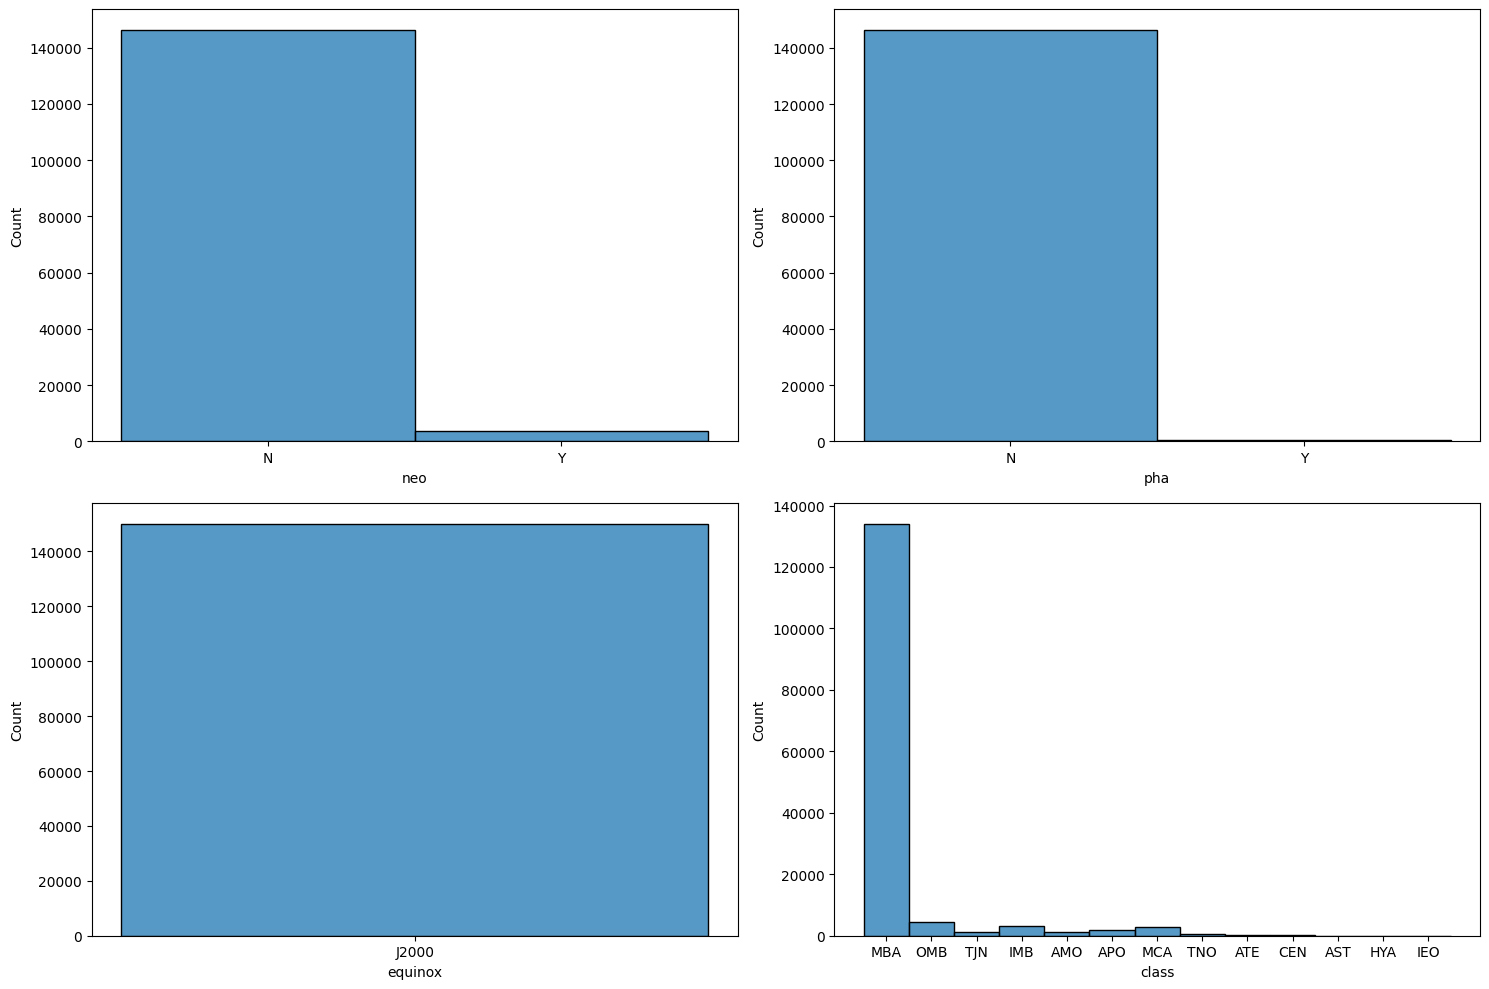

Conclusiones:

neo: la mayoría de objetos no son cercanos a la tierra

pha: la mayoría de objetos no son potencialmente peligroso

equinox:sólo existe una categoría, podemos eliminarla

class: la mayoría de asterioides son de clase MBA (Main Belt Asteroid). Son asteroides procedentes del cinturón principal que se encuentra entre Marte y Júpiter


In [9]:
# Análisis de variables univariante
# Variables categóricas 'neo', 'pha', 'equinox', 'class'
import matplotlib.pyplot as plt 
import seaborn as sns
fig, axis = plt.subplots(2, 2, figsize = (15, 10))

# Histograma múltiple
#"host_name" -> existen demasiados nombres como para crear hisograma

sns.histplot(ax = axis[0][0], data = sample_total_data, x = "neo")
sns.histplot(ax = axis[0][1], data = sample_total_data, x = "pha")
sns.histplot(ax = axis[1][0], data = sample_total_data, x = "equinox")
sns.histplot(ax = axis[1][1], data = sample_total_data, x = "class")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

print("Conclusiones:")
print("\nneo: la mayoría de objetos no son cercanos a la tierra")
print("\npha: la mayoría de objetos no son potencialmente peligroso")
print("\nequinox:sólo existe una categoría, podemos eliminarla")
print("\nclass: la mayoría de asterioides son de clase MBA (Main Belt Asteroid). Son asteroides procedentes del cinturón principal que se encuentra entre Marte y Júpiter")

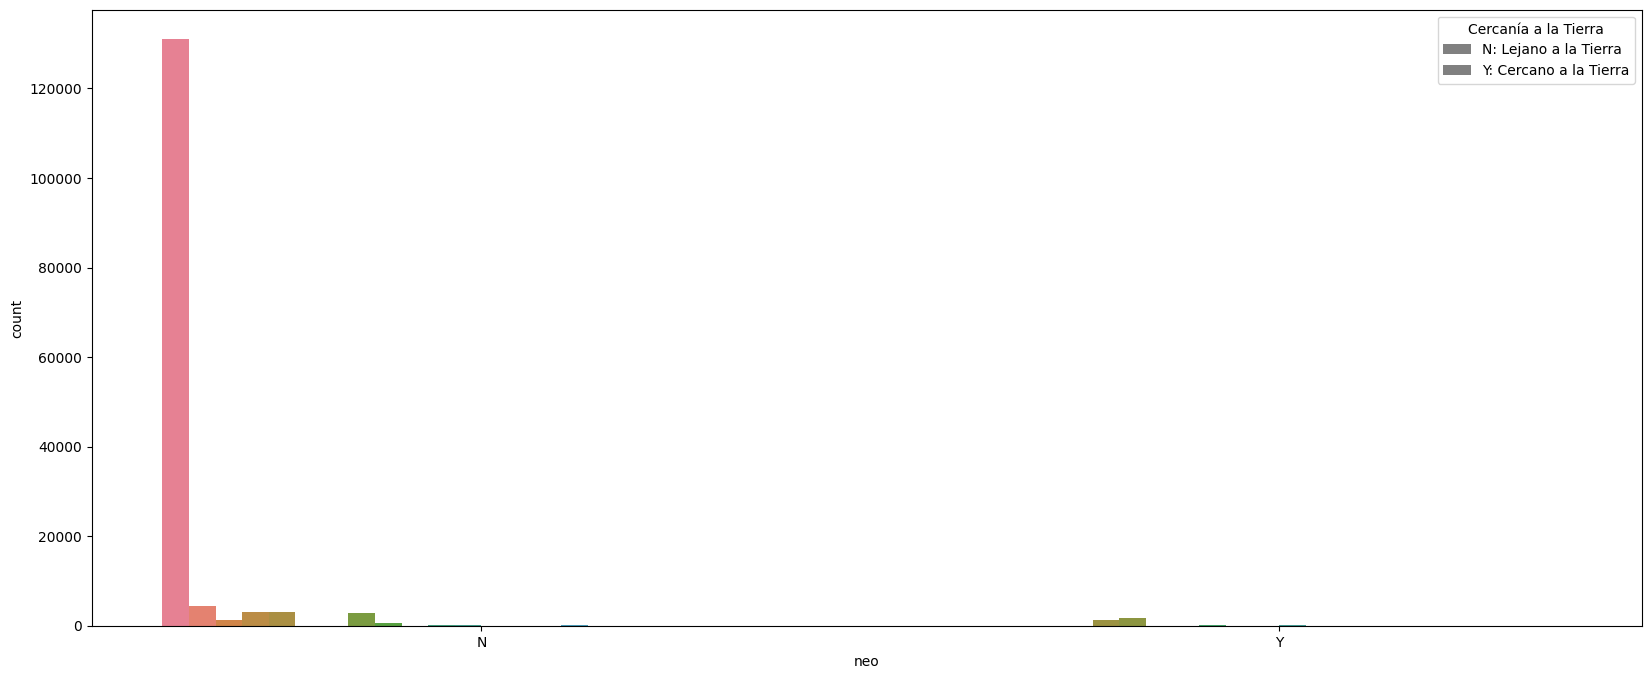

In [12]:
# Analisis de variables categorica - categorica --> El mayor porcentaje de asteroides está lejos del planeta tierra

# Crear una nueva columna combinando las variables deseadas
sample_total_data['combined_hue'] = (sample_total_data['pha'].astype(str) + '_' +
                                     sample_total_data['equinox'].astype(str) + '_' +
                                     sample_total_data['class'].astype(str))

# Crear el gráfico
fig, axis = plt.subplots(figsize=(20, 8))

sns.countplot(data=sample_total_data, x="neo", hue="combined_hue", ax=axis, legend=False)

# Definir la leyenda personalizada
legend_labels = {'N_NEO_orbit_id_equinox_class': 'N: Lejano a la Tierra',
                 'Y_NEO_orbit_id_equinox_class': 'Y: Cercano a la Tierra'}

# Crear la leyenda manualmente
handles = []
for key, label in legend_labels.items():
    handles.append(axis.bar(0, 0, color='gray', label=label))  # Crear una barra dummy para cada etiqueta

# Mostrar la leyenda fuera del gráfico
axis.legend(handles=handles, labels=legend_labels.values(), loc='upper right', title='Cercanía a la Tierra')

# Mostrar el gráfico
plt.show()

In [13]:
#   Eliminación de información irrelevante de variables categóricas, conclusión sacada de representación histograma
sample_total_data.drop(["equinox"], axis = 1, inplace = True)
sample_total_data.head(1)

,neo,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,...,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,class,combined_hue
323650,N,N,18.2,NaN,NaN,NaN,2459000.5,59000,20200531.0,0.139451,...,2.585274,0.288395,2.458379e+06,2.018092e+07,1248.288493,3.417628,0.968024,376.7259,MBA,N_J2000_MBA


In [ ]:
# Analisis numerico 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 4, figsize=(20, 15), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

sns.histplot(ax=axis[0, 0], data=sample_total_data, x="H")
sns.boxplot(ax=axis[1, 0], data=sample_total_data, x="H")

sns.histplot(ax=axis[0, 1], data=sample_total_data, x="diameter")
sns.boxplot(ax=axis[1, 1], data=sample_total_data, x="diameter")

sns.histplot(ax=axis[0, 2], data=sample_total_data, x="diameter_sigma")
sns.boxplot(ax=axis[1, 2], data=sample_total_data, x="diameter_sigma")

sns.histplot(ax=axis[0, 3], data=sample_total_data, x="epoch")
sns.boxplot(ax=axis[1, 3], data=sample_total_data, x="epoch")

sns.histplot(ax=axis[2, 0], data=sample_total_data, x="epoch_cal")
sns.boxplot(ax=axis[3, 0], data=sample_total_data, x="epoch_cal")

sns.histplot(ax=axis[2, 1], data=sample_total_data, x="epoch_cal")
sns.boxplot(ax=axis[3, 1], data=sample_total_data, x="epoch_cal")

sns.histplot(ax=axis[2, 2], data=sample_total_data, x="a")
sns.boxplot(ax=axis[3, 2], data=sample_total_data, x="a")

sns.histplot(ax=axis[2, 3], data=sample_total_data, x="q")
sns.boxplot(ax=axis[3, 3], data=sample_total_data, x="q")

sns.histplot(ax=axis[4, 0], data=sample_total_data, x="q")
sns.boxplot(ax=axis[5, 0], data=sample_total_data, x="q")

plt.tight_layout()
plt.show()


IndexError: index 4 is out of bounds for axis 0 with size 4

Error in callback <function flush_figures at 0x0000026927C5B880> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

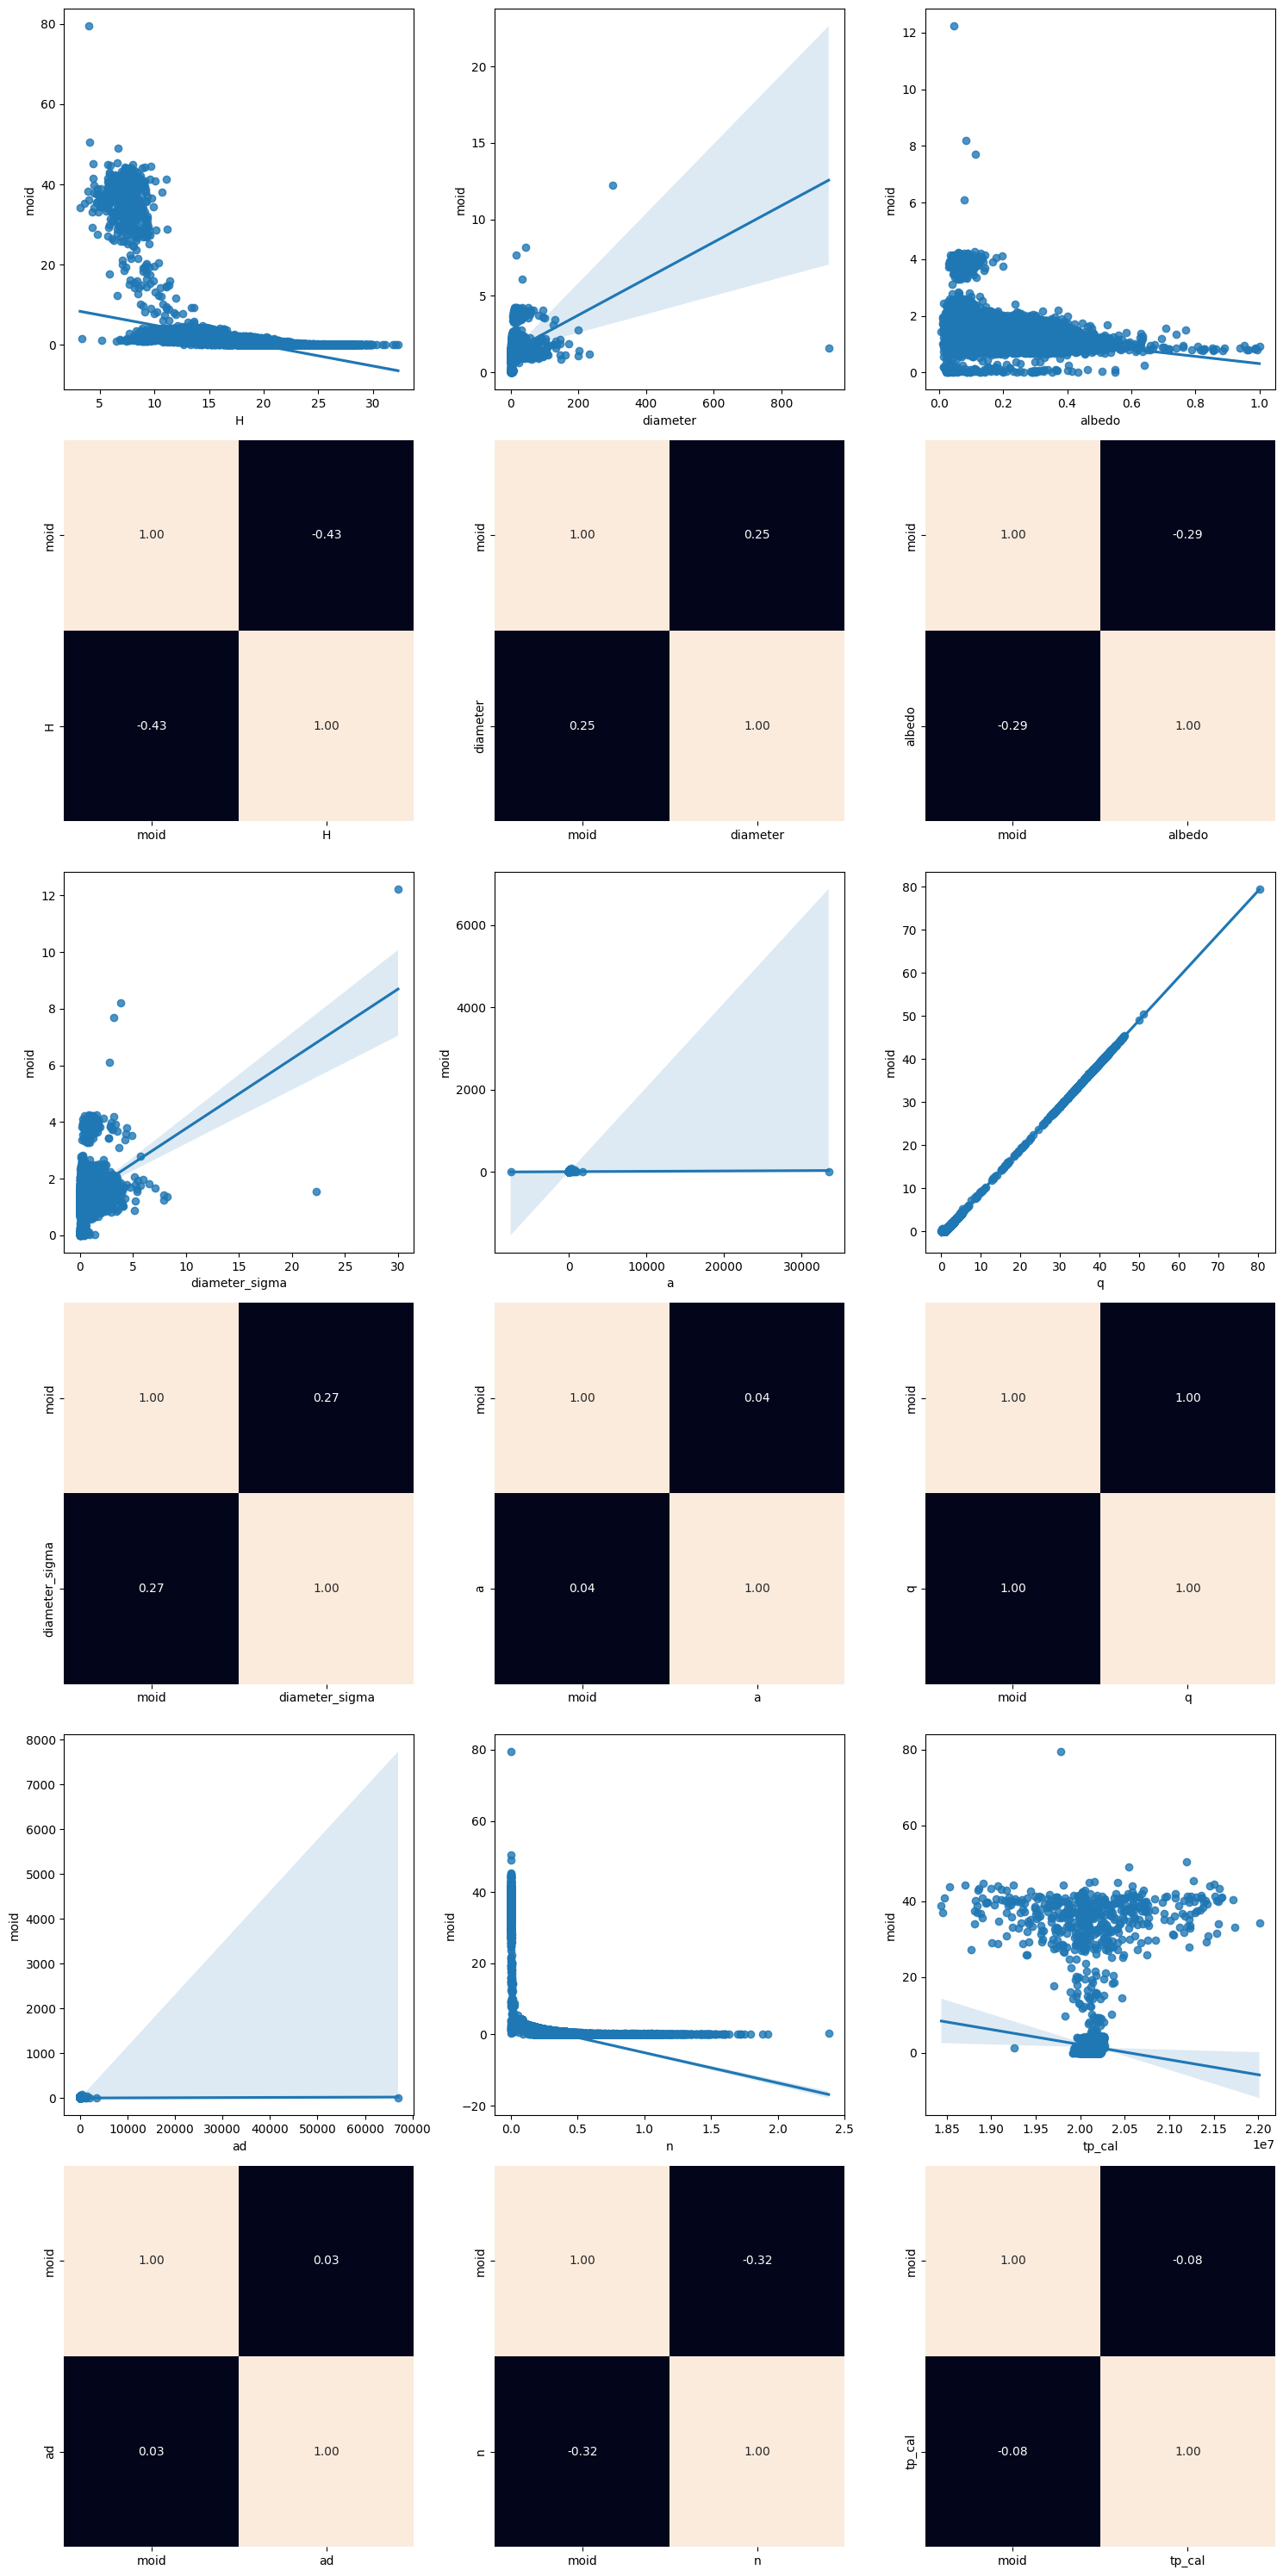

In [15]:
# Create scatter plots and heatmaps

ig, axis = plt.subplots(6, 3, figsize=(15, 30))


sns.regplot(data=sample_total_data, x="H", y="moid", ax=axis[0, 0]) 
sns.heatmap(sample_total_data[["moid", "H"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

sns.regplot(data=sample_total_data, x="diameter", y="moid", ax=axis[0, 1]) 
sns.heatmap(sample_total_data[["moid", "diameter"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)

sns.regplot(data=sample_total_data, x="albedo", y="moid", ax=axis[0, 2]) 
sns.heatmap(sample_total_data[["moid", "albedo"]].corr(), annot=True, fmt=".2f", ax=axis[1, 2], cbar=False)

sns.regplot(data=sample_total_data, x="diameter_sigma", y="moid", ax=axis[2, 0]) 
sns.heatmap(sample_total_data[["moid", "diameter_sigma"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0], cbar=False)

sns.regplot(data=sample_total_data, x="a", y="moid", ax=axis[2, 1]) 
sns.heatmap(sample_total_data[["moid", "a"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1], cbar=False)

sns.regplot(data=sample_total_data, x="q", y="moid", ax=axis[2, 2]) 
sns.heatmap(sample_total_data[["moid", "q"]].corr(), annot=True, fmt=".2f", ax=axis[3, 2], cbar=False)

sns.regplot(data=sample_total_data, x="ad", y="moid", ax=axis[4, 0]) 
sns.heatmap(sample_total_data[["moid", "ad"]].corr(), annot=True, fmt=".2f", ax=axis[5, 0], cbar=False)

sns.regplot(data=sample_total_data, x="n", y="moid", ax=axis[4, 1]) 
sns.heatmap(sample_total_data[["moid", "n"]].corr(), annot=True, fmt=".2f", ax=axis[5, 1], cbar=False)

sns.regplot(data=sample_total_data, x="tp_cal", y="moid", ax=axis[4, 2]) 
sns.heatmap(sample_total_data[["moid", "tp_cal"]].corr(), annot=True, fmt=".2f", ax=axis[5, 2], cbar=False)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


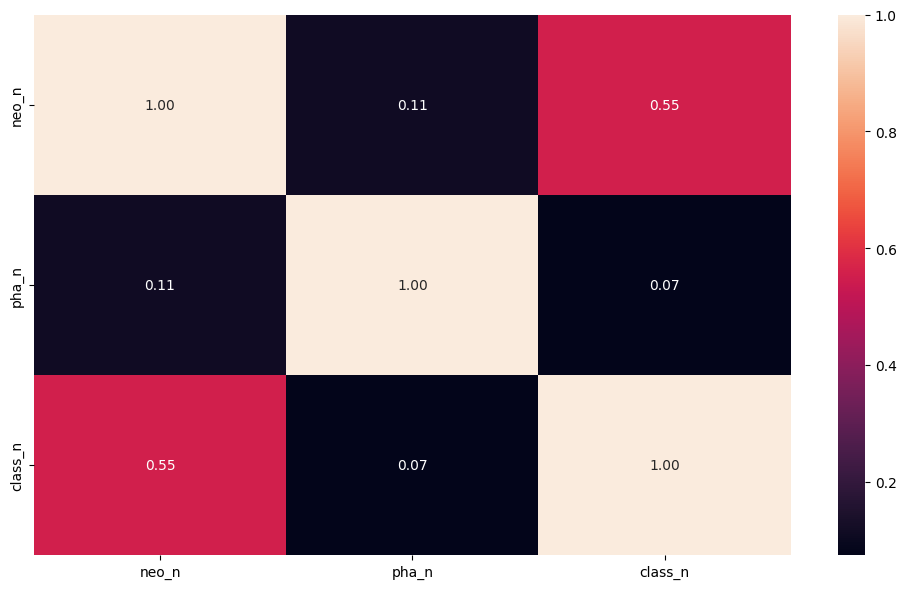

In [16]:
# Análisis de correlaciones variables categóricas
# Factoriazción de variables categóricas
sample_total_data["neo_n"] = pd.factorize(sample_total_data["neo"])[0]
sample_total_data["pha_n"] = pd.factorize(sample_total_data["pha"])[0]
sample_total_data["class_n"] = pd.factorize(sample_total_data["class"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(sample_total_data[["neo_n", "pha_n", "class_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

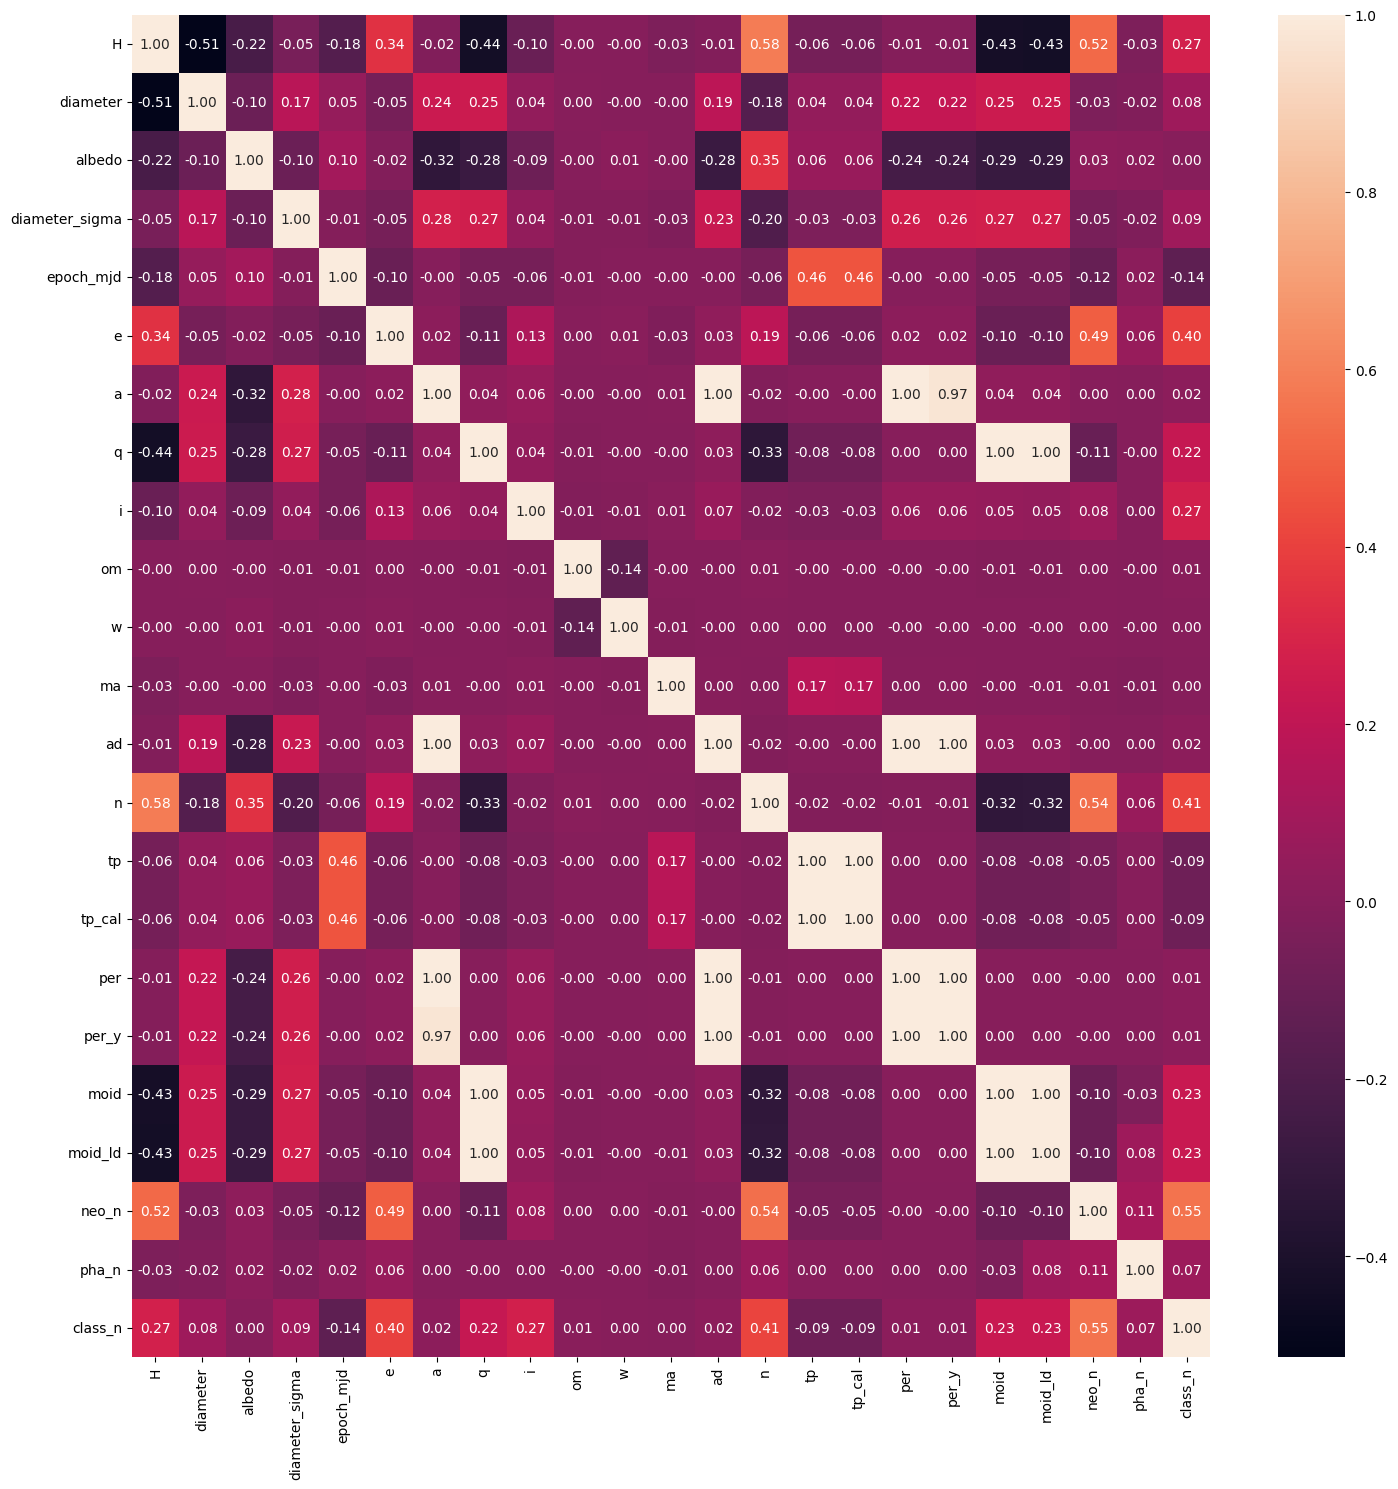

In [17]:
# Análisis numérico categórico (completo)
fig, axis = plt.subplots(figsize = (15, 15))

sns.heatmap(sample_total_data[['H', 'diameter', 'albedo', 'diameter_sigma', 'epoch_mjd', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'neo_n', 'pha_n', 'class_n']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [18]:
# Análisis de outliers
sample_total_data.describe()

,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,...,n,tp,tp_cal,per,per_y,moid,moid_ld,neo_n,pha_n,class_n
count,148974.000000,21312.000000,21147.000000,21283.000000,1.500000e+05,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,...,1.500000e+05,1.500000e+05,1.500000e+05,1.499990e+05,1.500000e+05,1.468250e+05,149981.000000,150000.000000,150000.000000,150000.000000
mean,16.908736,5.464764,0.130132,0.474555,2.458870e+06,58869.816707,2.019695e+07,0.156194,3.066260,2.390097,...,2.365181e-01,2.458855e+06,2.019578e+07,1.746864e+04,4.782621e+01,1.410026e+00,537.193051,0.024053,-0.019000,0.372167
std,1.785452,10.110335,0.109253,0.526713,6.981966e+02,698.196586,1.920891e+04,0.093133,88.885797,2.095731,...,7.875528e-02,1.550017e+03,4.254435e+04,5.780249e+06,1.582541e+04,2.113217e+00,817.504524,0.153259,0.151567,1.273898
min,3.200000,0.002500,0.007000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000008,-7520.984443,0.080744,...,1.608247e-07,2.394592e+06,1.844013e+07,1.511945e+02,0.000000e+00,4.544120e-07,0.000000,-1.000000,-1.000000,0.000000
25%,16.100000,2.801750,0.053000,0.179000,2.459000e+06,59000.000000,2.020053e+07,0.092121,2.387398,1.971707,...,1.894350e-01,2.458558e+06,2.019032e+07,1.347371e+03,3.688888e+00,9.798180e-01,375.358357,0.000000,0.000000,0.000000
50%,16.900000,3.990000,0.079000,0.333000,2.459000e+06,59000.000000,2.020053e+07,0.144796,2.647045,2.227235,...,2.288555e-01,2.458941e+06,2.020040e+07,1.573044e+03,4.306756e+00,1.241970e+00,478.033078,0.000000,0.000000,0.000000
75%,17.723000,5.783000,0.189000,0.623000,2.459000e+06,59000.000000,2.020053e+07,0.200326,3.002583,2.577647,...,2.671866e-01,2.459358e+06,2.021052e+07,1.900384e+03,5.202963e+00,1.592710e+00,616.939526,0.000000,0.000000,0.000000
max,32.300000,939.400000,1.000000,30.000000,2.459000e+06,59000.000000,2.020053e+07,1.001173,33488.895955,80.398819,...,2.381039e+00,2.525117e+06,2.201061e+07,2.238462e+09,6.128574e+06,7.947660e+01,30929.908422,1.000000,1.000000,12.000000


In [19]:
# Analisis de outline `H`

H_stats = sample_total_data["H"].describe()
H_stats

count    148974.000000
mean         16.908736
std           1.785452
min           3.200000
25%          16.100000
50%          16.900000
75%          17.723000
max          32.300000
Name: H, dtype: float64

In [20]:
# IQR para `H`
h_iqr = H_stats["75%"] - H_stats["25%"]

upper_limit = H_stats["75%"] + 1.5 * h_iqr
limite_inferior = H_stats["25%"] - 1.5 * H_stats

print(f"Los límites superior e inferior para encontrar valores atípicos son {round (upper_limit, 2)} y {round(limite_inferior, 2)}, con un rango intercuartílico de {round(h_iqr, 2)}")


# Los valores negativos significan que el objeto va en la dirección izquerda, al tratarse de direccionalidad no se hace relevante el ajuste de datos de esta variable

Los límites superior e inferior para encontrar valores atípicos son 20.16 y count   -223444.90
mean         -9.26
std          13.42
min          11.30
25%          -8.05
50%          -9.25
75%         -10.48
max         -32.35
Name: H, dtype: float64, con un rango intercuartílico de 1.62


In [21]:
# Analisis de outline `diameter`

diameter_stats = sample_total_data["diameter"].describe()
diameter_stats

count    21312.000000
mean         5.464764
std         10.110335
min          0.002500
25%          2.801750
50%          3.990000
75%          5.783000
max        939.400000
Name: diameter, dtype: float64

In [22]:
# IQR para `diameter_sigma`
diameter_iqr = diameter_stats["75%"] - diameter_stats["25%"]

upper_limit = diameter_stats["75%"] + 1.5 * diameter_iqr
limite_inferior = diameter_stats["25%"] - 1.5 * diameter_iqr

print(f"Los límites superior e inferior para encontrar valores atípicos son {round (upper_limit, 2)} y {round(limite_inferior, 2)}, con un rango intercuartílico de {round(diameter_iqr, 2)}")

#Los diametros no pueden ser negativos, sin embargo en cuanto a valores faltantes está variable tiene más del 80% por lo que no se considera su ajuste.

Los límites superior e inferior para encontrar valores atípicos son 10.25 y -1.67, con un rango intercuartílico de 2.98


In [23]:
# Analisis de outline `diameter_sigma`

sigma_stats = sample_total_data["diameter_sigma"].describe()
sigma_stats

count    21283.000000
mean         0.474555
std          0.526713
min          0.000500
25%          0.179000
50%          0.333000
75%          0.623000
max         30.000000
Name: diameter_sigma, dtype: float64

In [24]:
# IQR para `diameter_sigma`
sigma_iqr = sigma_stats["75%"] - sigma_stats["25%"]

upper_limit = sigma_stats["75%"] + 1.5 * sigma_iqr
limite_inferior = sigma_stats["25%"] - 1.5 * sigma_iqr

print(f"Los límites superior e inferior para encontrar valores atípicos son {round (upper_limit, 2)} y {round(limite_inferior, 2)}, con un rango intercuartílico de {round(sigma_iqr, 2)}")

Los límites superior e inferior para encontrar valores atípicos son 1.29 y -0.49, con un rango intercuartílico de 0.44


In [25]:
# Analisis de outline `albedo`

albedo_stats = sample_total_data["albedo"].describe()
albedo_stats

count    21147.000000
mean         0.130132
std          0.109253
min          0.007000
25%          0.053000
50%          0.079000
75%          0.189000
max          1.000000
Name: albedo, dtype: float64

In [26]:
# IQR para `albedo`
albedo_iqr = albedo_stats["75%"] - albedo_stats["25%"]

upper_limit = albedo_stats["75%"] + 1.5 * albedo_iqr
limite_inferior = albedo_stats["25%"] - 1.5 * albedo_iqr

print(f"Los límites superior e inferior para encontrar valores atípicos son {round (upper_limit, 2)} y {round(limite_inferior, 2)}, con un rango intercuartílico de {round(albedo_iqr, 2)}")

Los límites superior e inferior para encontrar valores atípicos son 0.39 y -0.15, con un rango intercuartílico de 0.14


<Axes: xlabel='moid'>

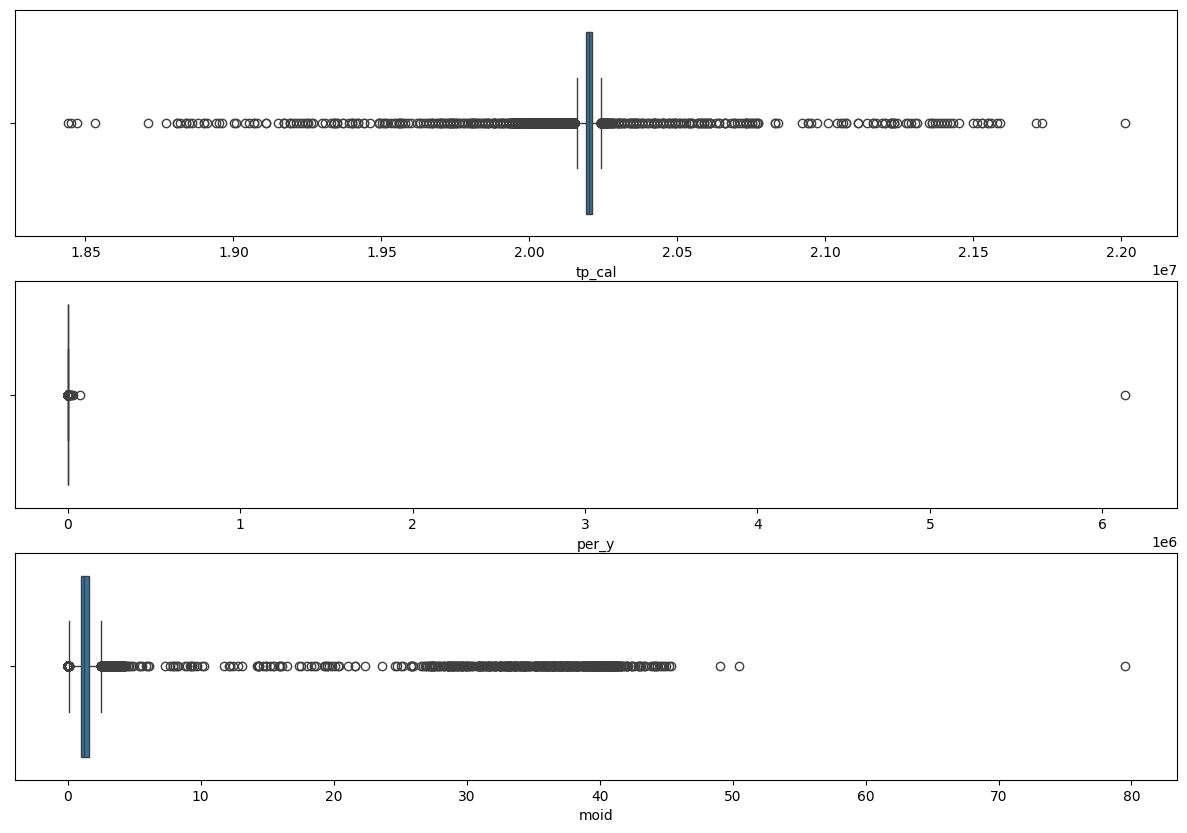

In [27]:
# Variables a analizar 'tp_cal', 'per_y', 'moid'
fig, axis = plt.subplots(3, 1, figsize = (15, 10))

sns.boxplot(ax = axis[0], data = sample_total_data, x = "tp_cal")
sns.boxplot(ax = axis[1], data = sample_total_data, x = "per_y")
sns.boxplot(ax = axis[2], data = sample_total_data, x = "moid")

# tp_call -> tiempo de paso por el perihelio, ¿son posibles las fechasde los outliers?
# per_y -> ¿puede un asteroide tardar 20000 años en completar una órbita? -> sí. Por tanto, no eliminamos ningún outlier
# moid -> 'Distancia mínima de intersección de la órbita (distancia más cercana a la órbita de la Tierra, en unidades astronómicas)'
#   Unidad astronómica 1UA = 149 597 870 700 m
#   No podemos eliminar los outliers de la derecha ya que son factibles
#   Estudio del outlier = 0 (siguiente caja de código)


Análisis descriptivo de la variable a:
count    150000.000000
mean          3.066260
std          88.885797
min       -7520.984443
25%           2.387398
50%           2.647045
75%           3.002583
max       33488.895955
Name: a, dtype: float64
Número de outliers en a: 3773
Valores límite inferior y superior para a: 1.4646212686883362, 3.925359806880134
Outliers en a:
                 a
317050   3.981956
344005   5.205284
352665   5.164403
310106   5.179891
506360   3.954158
...           ...
808245   5.255092
956825   1.411459
138910   1.349599
811832  55.543316
630741   1.298032

[3773 rows x 1 columns]


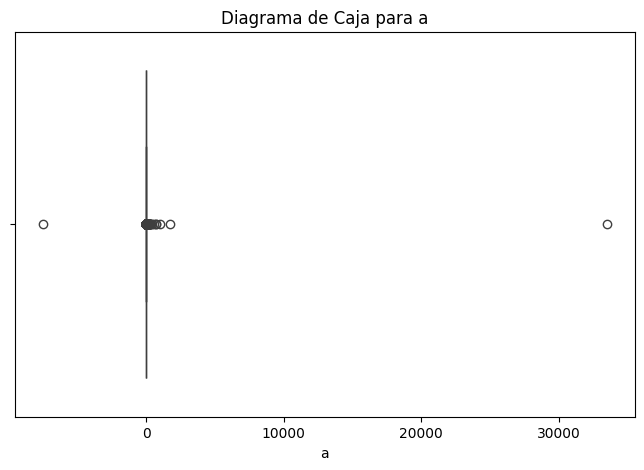


Análisis descriptivo de la variable q:
count    150000.000000
mean          2.390097
std           2.095731
min           0.080744
25%           1.971707
50%           2.227235
75%           2.577647
max          80.398819
Name: q, dtype: float64
Número de outliers en q: 4552
Valores límite inferior y superior para q: 1.0627975089040398, 3.486556916570909
Outliers en q:
                 q
344005   4.382544
352665   5.075118
310106   4.567244
957169   0.784234
556501   4.926126
...           ...
956825   1.034694
582452   0.865850
162997   1.010793
811832  37.376432
630741   0.806677

[4552 rows x 1 columns]


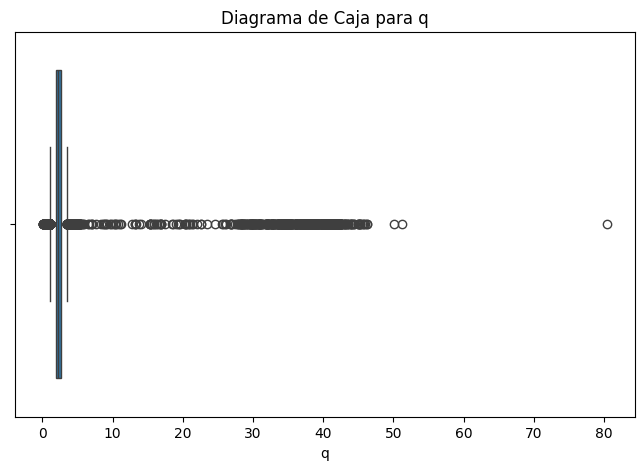


Análisis descriptivo de la variable ad:
count    149999.000000
mean          3.842788
std         173.407580
min           0.793855
25%           2.780959
50%           3.046301
75%           3.365158
max       66972.796064
Name: ad, dtype: float64
Número de outliers en ad: 4600
Valores límite inferior y superior para ad: 1.9046592439617078, 4.241457771977233
Outliers en ad:
                ad
317050   4.744743
344005   6.028024
352665   5.253688
310106   5.792538
506360   5.233820
...           ...
952242   4.544455
956825   1.788223
138910   1.459649
811832  73.710200
630741   1.789386

[4600 rows x 1 columns]


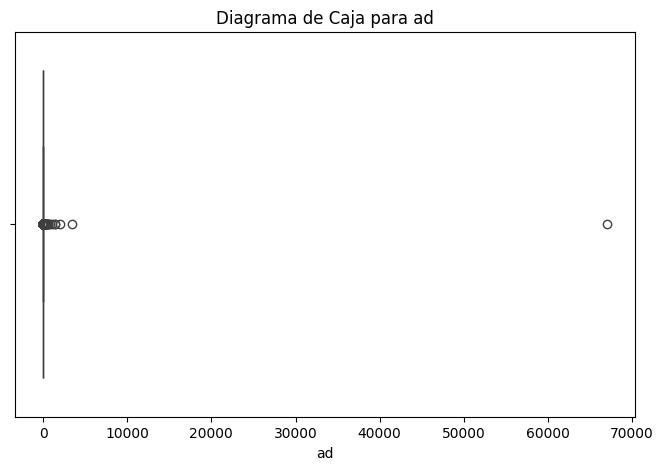


Análisis descriptivo de la variable n:
count    1.500000e+05
mean     2.365181e-01
std      7.875528e-02
min      1.608247e-07
25%      1.894350e-01
50%      2.288555e-01
75%      2.671866e-01
max      2.381039e+00
Name: n, dtype: float64
Número de outliers en n: 3693
Valores límite inferior y superior para n: 0.07280757125599227, 0.3838140870747787
Outliers en n:
                n
957169  0.677272
718779  0.001724
946283  0.404291
546199  0.003244
823071  0.433098
...          ...
138910  0.628632
582452  0.468660
811832  0.002381
630741  0.666463
400384  0.386779

[3693 rows x 1 columns]


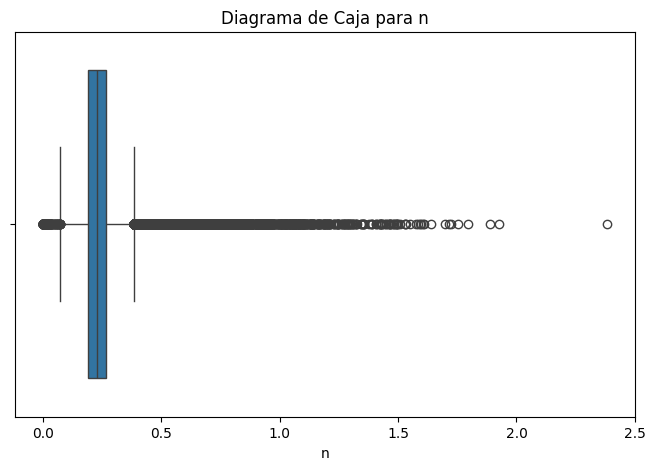

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Variables específicas para el análisis
variables = ['a', 'q', 'ad', 'n']

# Función para calcular outliers utilizando el rango intercuartílico (IQR)
def calculate_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Análisis descriptivo y gráficos de caja
for col in variables:
    print(f'\nAnálisis descriptivo de la variable {col}:')
    print(sample_total_data[col].describe())
    
    # Calcular y mostrar outliers
    outliers, lower_bound, upper_bound = calculate_outliers(sample_total_data, col)
    print(f'Número de outliers en {col}: {len(outliers)}')
    print(f'Valores límite inferior y superior para {col}: {lower_bound}, {upper_bound}')
    print(f'Outliers en {col}:\n', outliers[[col]])
    
    # Crear el gráfico de caja
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=sample_total_data[col])
    plt.title(f'Diagrama de Caja para {col}')
    plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ['epoch_mjd', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld']
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(sample_total_data[num_variables])
df_scal = pd.DataFrame(scal_features, index = sample_total_data.index, columns = num_variables)
df_scal["moid"] = sample_total_data["moid"]
df_scal.head()

In [ ]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scal.drop("moid", axis = 1)
y = df_scal["moid"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

In [ ]:
#X_train_sel["moid"] = list(y_train)
#X_test_sel["moid"] = list(y_test)
#X_train_sel.to_csv("clean_train.csv", index = False)
#X_test_sel.to_csv("clean_test.csv", index = False)